In [1]:
import os
# Only for first run after kernel restart
os.chdir('..')

In [2]:
from src.utils import *
from src.config import *
import pandas as pd
import src.utils as utils
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label  
from PIL import Image
import cv2
import torch
from torch.utils import data
from albumentations import (
    HorizontalFlip,
    VerticalFlip,
    Resize,
    CenterCrop,
    ToGray,
    RandomCrop,
    OpticalDistortion,
    RandomRotate90,
    RandomSizedCrop,
    Transpose,
    GridDistortion,
    Blur,
    InvertImg,
    GaussNoise,
    OneOf,
    ElasticTransform,
    MedianBlur,
    ShiftScaleRotate,
    Rotate,
    Normalize,
    Crop,
    CLAHE,
    Flip,
    LongestMaxSize,
    RandomScale,
    PadIfNeeded,
    Compose,
    RandomBrightness,
    RandomContrast,
    convert_bboxes_to_albumentations,
    filter_bboxes_by_visibility,
    denormalize_bbox,
    RandomGamma)


In [142]:
df = pd.read_csv('data/train_ship_segmentations_v2.csv')

In [4]:
df['isempty'] = df.apply(lambda x: 1 if x.EncodedPixels is np.nan else 0, axis=1)

In [5]:
df = df.merge(df.groupby('ImageId').count()[['EncodedPixels']].rename({'EncodedPixels': 'ships'}, axis=1),
              right_index=True, left_on='ImageId')

In [396]:
df['msize'] = df.apply(lambda x: np.sum(utils.rle_decode(x.EncodedPixels)), axis=1)

In [ ]:
df.to_csv('../data/processed.csv',index=False)

In [3]:
df = pd.read_csv('data/processed.csv')

In [4]:
from torch.utils import data

In [5]:
from src.data import AirbusSegmentation

In [6]:
ds = AirbusSegmentation(df)

In [111]:
i, m = ds[1208]

In [112]:
flips = [
    [1],
    [2],
    [1, 2]
]

In [126]:
def rotate_tensor(tensor, k):
    if k == 0:
        return tensor
    n_t = tensor.numpy()
    axes = (len(tensor.shape)-2, len(tensor.shape)-1)
    n_t = np.rot90(n_t, k=k, axes=axes).copy()
    return torch.FloatTensor(n_t)

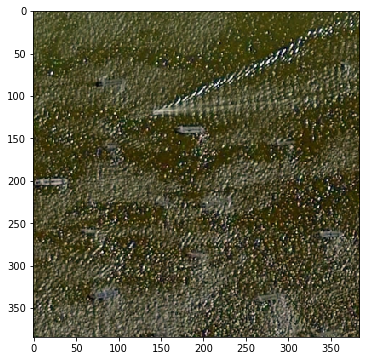

In [141]:
imshow(rotate_tensor(i, -3))

In [153]:
# plt.imshow(np.asarray(Image.open('../data/train_v2/' + t.iloc[70000, 0])))
# plt.show()
# plt.imshow(utils.rle_decode(t.iloc[70000, 1]))